In [1]:
import numpy as np 
from numpy import exp
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [2]:
pop_size = 3.3e8
a = 1 / 18
b = 1 / 5.2

In [3]:
def F(x, t, R0=1.6):

    s, e, i = x
    beta = R0(t) * a if callable(R0) else R0 * a
    ne = beta * s * i
    ds = - ne
    de = ne - b * e
    di = b * e - a * i

    return ds, de, di

In [4]:
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

In [5]:
x_0 = s_0, e_0, i_0

In [6]:
def solve_path(R0, t_vec, x_init=x_0):
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path, = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path
    return i_path, c_path

In [7]:
# run the codes
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [8]:
# Experiment 1: Constant R0 Case
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

In [9]:
def plot_path(paths, labels, times=t_vec):
    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)
    
    ax.legend(loc='upper left')

    plt.show()

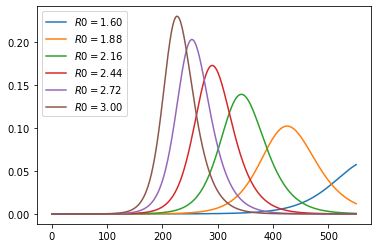

In [11]:
plot_path(i_paths, labels)

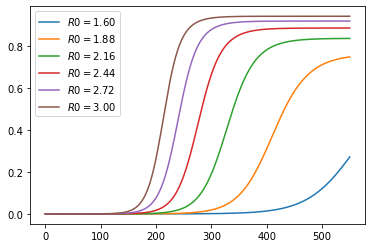

In [13]:
plot_path(c_paths, labels)

In [14]:
# Experiment 2: Changing Mitigation

In [15]:
def R0_mitigating(t, r0=3, yi=1, r_bar=1.6):
    R0 = r0 * exp(- yi * t) + (1 - exp(-yi * t)) * r_bar
    return R0

In [19]:
yi_vals = 1/5, 1/10, 1/20, 1/50, 1/100
labels = [fr'$\eta = {yi:.2f}$' for yi in yi_vals]

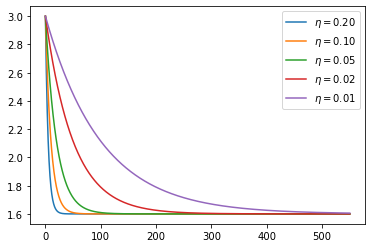

In [20]:
fig, ax = plt.subplots()
for yi, label in zip(yi_vals, labels):
    ax.plot(t_vec, R0_mitigating(t_vec, yi=yi), label=label)

ax.legend()
plt.show()

In [21]:
i_paths, c_paths = [], []

for yi in yi_vals:
    R0 = lambda t: R0_mitigating(t, yi=yi)
    i_path, c_path = solve_path(R0, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

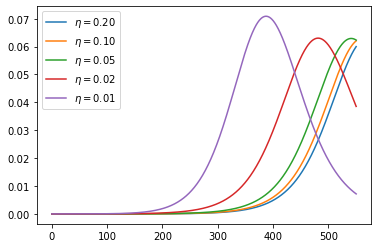

In [22]:
plot_path(i_paths, labels)

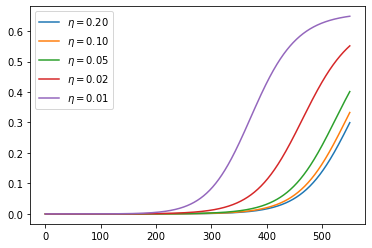

In [23]:
plot_path(c_paths, labels)

In [24]:
# Ending Lockdown
# initial conditions
i_0 = 25000 / pop_size
e_0 = 75000 / pop_size
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0

In [27]:
R0_paths = (lambda t: 0.5 if t < 30 else 2,
           lambda t: 0.5 if t < 120 else 2)
labels = [f'scenario {i}' for i in (1,2)]
i_path, c_path = [], []
for R0 in R0_paths:
    i_path, c_path = solve_path(R0, t_vec, x_init=x_0)
    i_paths.append(i_path)
    c_paths.append(c_path)

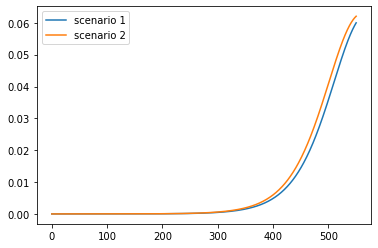

In [31]:
plot_path(i_paths, labels)